Q1. A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.

Please assist the consultant in the area of statistical analysis by doing this;

a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

b. A graphical analysis of the additives, including a distribution study.

c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

ingredients.csv

In [12]:
#a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.
import pandas as pd
import matplotlib
import pingouin as pg

additives=pd.read_csv("E:\\Ingredient.csv")
correlations=additives.corr()
descriptive_stats=additives.describe()
display(correlations)
display(descriptive_stats)

df=pd.melt(additives)
aov = pg.anova(data=df, dv='value', between='variable', detailed=True)
print(aov)
#reject the null hypothesis that there's no difference between the means

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


     Source             SS    DF             MS              F  p-unc  \
0  variable  943261.084445     8  117907.635556  168331.968858    0.0   
1    Within    1342.757047  1917       0.700447            NaN    NaN   

        np2  
0  0.998578  
1       NaN  


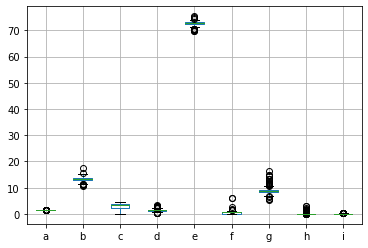

In [3]:
#b. A graphical analysis of the additives, including a distribution study.
additives.boxplot()

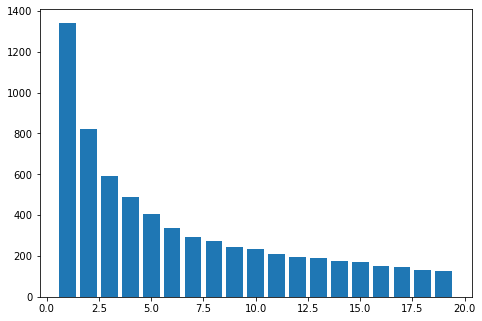

There are probably 5 formulations


In [6]:
from sklearn.cluster import KMeans
sse = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(additives)
    sse.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(1,20)),sse)
plt.show()

#elbow locating
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow
print ("There are probably {} formulations".format(kl.elbow))